In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', color_codes=True)
iris_original = pd.read_csv('Iris.csv')
iris = iris_original.copy()
iris = iris.drop('Id', axis=1)
import numpy as np

In [2]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [3]:
iris.shape

(150, 5)

In [4]:
iris.describe(include="all")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [5]:
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [6]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

### Uni-Variate Plots

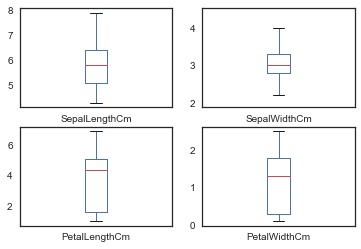

In [8]:
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

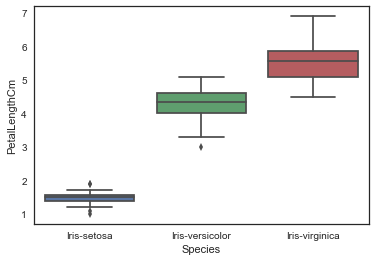

In [9]:
sns.boxplot(x='Species', y='PetalLengthCm', data=iris)

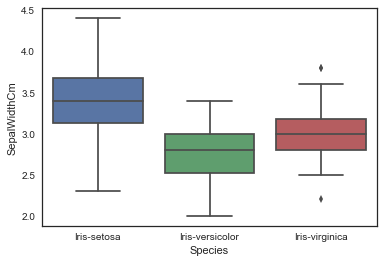

In [10]:
sns.boxplot(x='Species', y='SepalWidthCm', data=iris)

# Outliers Alert!! :P

Outliers replaced by Median!!


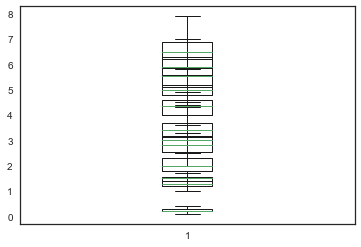

In [11]:
iris_class =  ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
for i in range(0,4) :
    for j in range(0,3) : 
        #print("***Boxplot for " + iris.columns.values[i] + " and " + iris_class[j])
        data = iris[iris.columns.values[i]][iris.Species == iris_class[j]]
        #print("Median : ", np.median(data))
        boxfox = plt.boxplot(data, showfliers=True)
        #print('Whiskers: ', [item.get_ydata()[1] for item in boxfox['whiskers']])
        x = [item.get_ydata() for item in boxfox['fliers']]
        #print('Outliers: ', x[0])
        if len(x[0] > 0) :
            #print(x[0])
            for k in range(0, len(x[0])) : 
                #print("ol for " , data)
                #print("outliers ",  x[0][k])
                data.replace(x[0][k], np.median(data),inplace=True)
                #print("bla", data)
                iris[iris.columns.values[i]][iris.Species == iris_class[j]] = data
        #plt.pause(0.05)
#iris.SepalWidthCm[iris.Species == 'Iris-virginica']
print("Outliers replaced by Median!!")
        

# Plots and lots of plots :P

In [12]:
# We can also plot these below graphs by using above for loop in single run

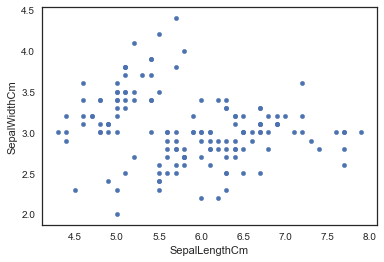

In [13]:
iris.plot(kind="scatter", x="SepalLengthCm",y= "SepalWidthCm") #plot is function from pandas library

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


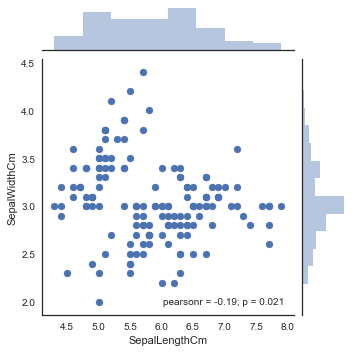

In [14]:
#Joint Plot Univariate-> histogram and bivariate-> scatter plot
sns.jointplot(x="SepalLengthCm",y= "SepalWidthCm", data=iris,size=5)

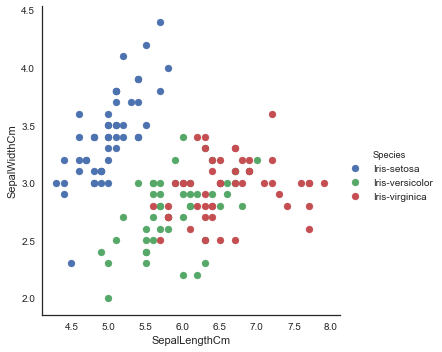

In [15]:
#Facet grid ->To color the scatter plot by species
sns.FacetGrid(iris, hue="Species", size=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

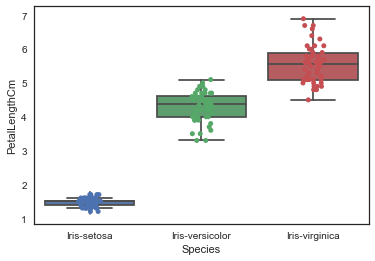

In [16]:
ax = sns.boxplot(x="Species", y = "PetalLengthCm", data=iris)
ax= sns.stripplot(x="Species", y = "PetalLengthCm", data=iris, jitter = True, edgecolor= "gray")

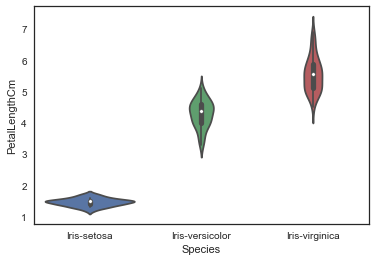

In [17]:
sns.violinplot(x="Species", y = "PetalLengthCm", data=iris)

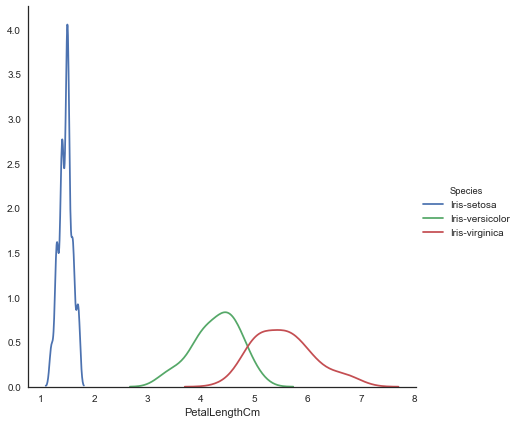

In [18]:
sns.FacetGrid(iris, hue="Species", size= 6).map(sns.kdeplot, "PetalLengthCm").add_legend()

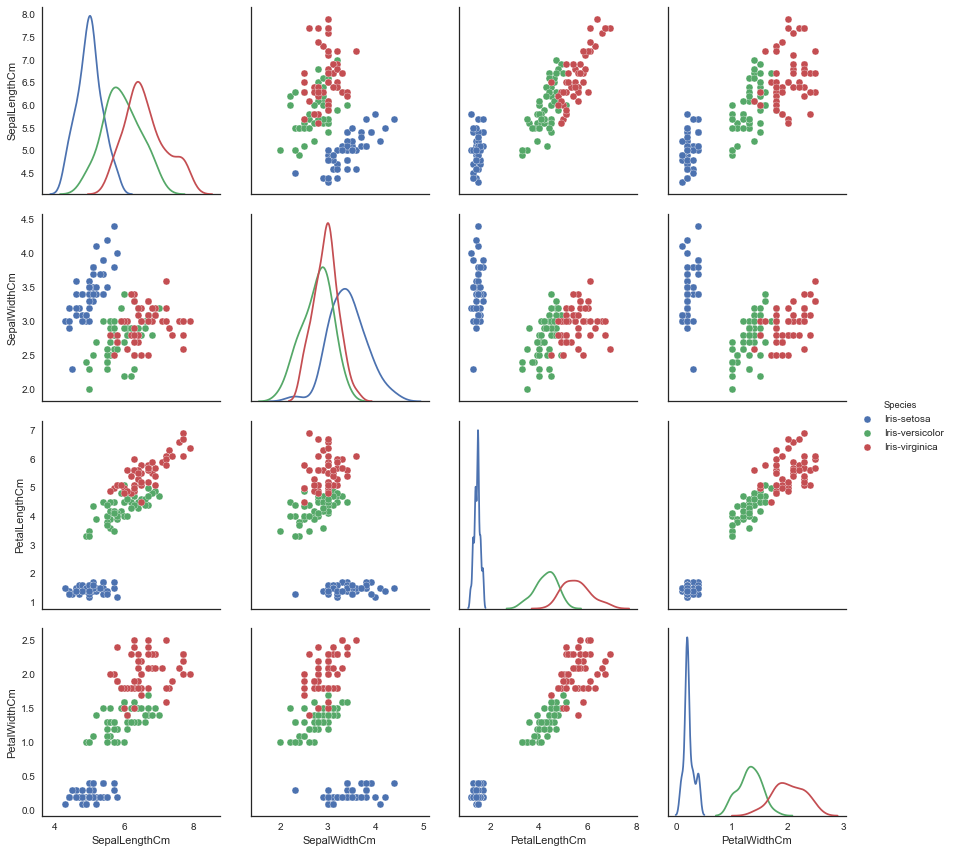

In [19]:
sns.pairplot(iris, hue="Species", size =3,diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F82C83E208>,
      dtype=object)

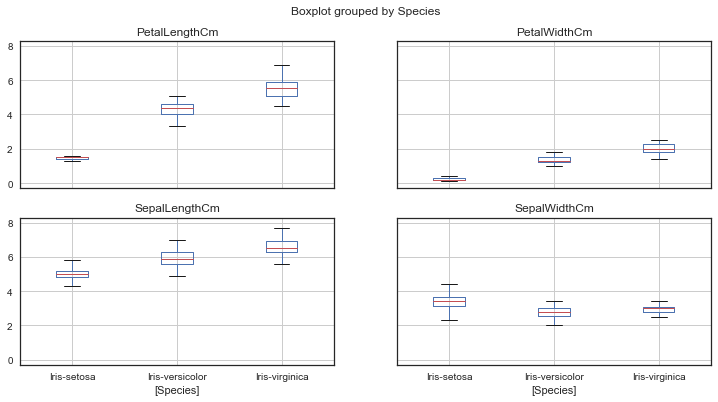

In [20]:
iris.boxplot(by='Species', figsize=(12,6))

In [21]:
# from above plots its clearly visible that PetalLengthCm matters a lot while classification of ris flower!

In [22]:
 #train test split

In [23]:
from sklearn.model_selection import train_test_split
X = iris.iloc[:,:-1]
y = iris.iloc[:,-1]
train_X,test_X, train_y,test_y = train_test_split(X, y ,test_size=0.25, random_state=0)

# It's time for some learning now !!

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, roc_auc_score

In [25]:
log_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs",random_state=0)
log_reg = log_reg.fit(train_X, train_y)
y_pred = log_reg.predict(test_X)

In [26]:
accuracy_score(test_y, y_pred)

0.9736842105263158

In [27]:
#ROC curves are typically used in binary classification 
#to study the output of a classifier. In order to extend ROC curve and 
#ROC area to multi-class or multi-label classification, 
#it is necessary to binarize the output. One ROC curve can be drawn per label,
#but one can also draw a ROC curve by considering each element of the label indicator 
#matrix as a binary prediction (micro-averaging).

# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
decision_Tree = DecisionTreeClassifier( random_state=0)
decision_Tree.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [30]:
y_pred_DT = decision_Tree.predict(test_X)

In [31]:
accuracy_score(test_y, y_pred_DT)

0.9473684210526315

# Random Forest

In [32]:
from sklearn.ensemble import  RandomForestClassifier

In [33]:
random_forest = RandomForestClassifier(random_state=0,oob_score=True)
random_forest.fit(train_X, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [34]:
y_pred_RF = random_forest.predict(test_X)

In [35]:
random_forest.oob_score_

0.9375

In [36]:
accuracy_score(test_y, y_pred_RF)

0.9473684210526315

# k-NN (k Nearest Neighbors)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
neighbor = KNeighborsClassifier()

In [39]:
neighbor.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [40]:
y_pred_KNN = neighbor.predict(test_X)

In [41]:
accuracy_score(test_y, y_pred_KNN)

0.9473684210526315